In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
customers = pd.read_csv(r"C:\Users\Ayushi singh\Downloads\Untitled Folder\Customers.csv")
products = pd.read_csv(r"C:\Users\Ayushi singh\Downloads\Untitled Folder\Products.csv")
transactions = pd.read_csv(r"C:\Users\Ayushi singh\Downloads\Untitled Folder\Transactions.csv")


In [7]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
print("\nNull Values in Customers:")
print(customers.isnull().sum())

print("\nDuplicate Rows in Customers:", customers.duplicated().sum())



Null Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Duplicate Rows in Customers: 0


In [9]:
print("\nNull Values in Products:")
print(products.isnull().sum())


Null Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [10]:
print("\nNull Values in Transactions:")
print(transactions.isnull().sum())


Null Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [12]:
print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [13]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print("\nMerged Data Preview:")
print(merged_data.head())


Merged Data Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLi

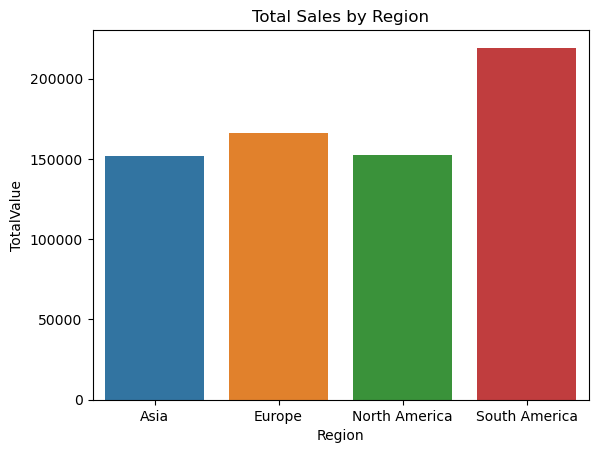

In [14]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
sns.barplot(data=region_sales, x="Region", y="TotalValue")
plt.title("Total Sales by Region")
plt.show()

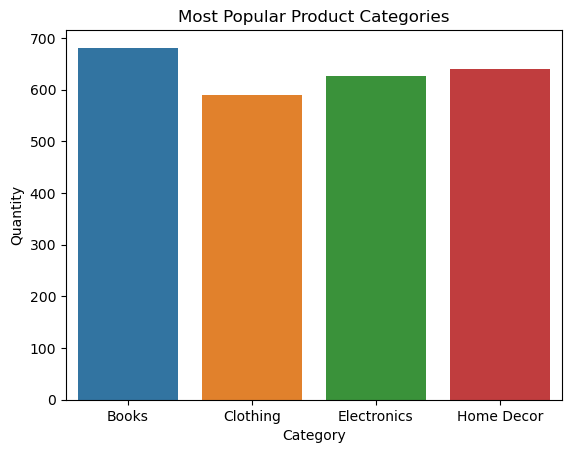

In [15]:
category_sales = merged_data.groupby("Category")["Quantity"].sum().reset_index()
sns.barplot(data=category_sales, x="Category", y="Quantity")
plt.title("Most Popular Product Categories")
plt.show()

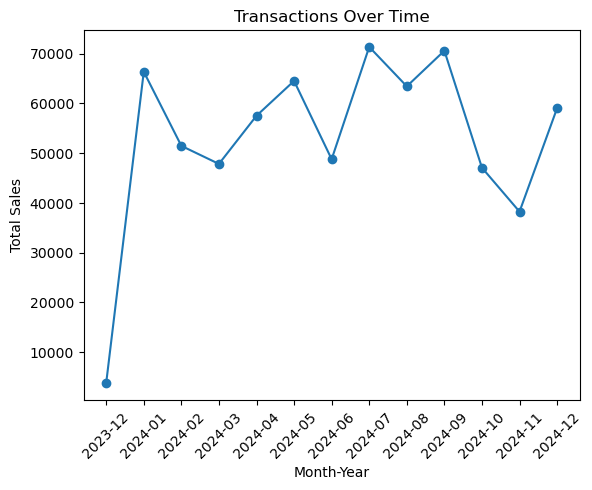

In [16]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
transactions_over_time = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum().reset_index()
transactions_over_time["TransactionDate"] = transactions_over_time["TransactionDate"].astype(str)
plt.plot(transactions_over_time["TransactionDate"], transactions_over_time["TotalValue"], marker="o")
plt.title("Transactions Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
